In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("train.csv")
df.replace(np.nan, 0, inplace=True)

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'], format="%d.%m.%Y %H:%M:%S")

In [40]:
# Инженерия признаков
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['day_of_month'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df = df.dropna()

In [80]:
df[df['total']>0]

,datetime,total,hour,day_of_week,day_of_month,month,year
1,2005-01-01 01:00:00,154139.8084,1,5,1,1,2005
2,2005-01-01 02:00:00,157818.3593,2,5,1,1,2005
3,2005-01-01 03:00:00,149310.6991,3,5,1,1,2005
4,2005-01-01 04:00:00,138282.0380,4,5,1,1,2005
5,2005-01-01 05:00:00,132032.7479,5,5,1,1,2005
...,...,...,...,...,...,...,...
35059,2008-12-31 19:00:00,249376.3608,19,2,31,12,2008
35060,2008-12-31 20:00:00,246510.5725,20,2,31,12,2008
35061,2008-12-31 21:00:00,226469.4133,21,2,31,12,2008
35062,2008-12-31 22:00:00,199907.3942,22,2,31,12,2008


In [81]:
df=df[df['total']>0]

In [82]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [52]:
features = ['hour', 'day_of_week', 'day_of_month', 'month', 'year']
target = 'total'

param_grid = {
    'n_estimators': [300, 600, 1200],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4]
}

In [53]:
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(train[features], train[target])

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  12.8s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  12.7s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  12.3s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  25.7s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  23.8s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  24.5s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  50.2s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  50.4s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  48.3s
[CV] END min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=  11.4s
[CV] END min_samples_leaf=1, min_samples_split=3, n_estimators=300

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 600, 1200]},
             scoring='r2', verbose=2)

In [59]:
best_params = grid_search.best_params_
print(f'Наилучшие гиперпараметры: {best_params}')

Наилучшие гиперпараметры: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 600}


In [83]:
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(train[features], train[target])

RandomForestRegressor(min_samples_leaf=2, n_estimators=600, random_state=42)

In [84]:
predicted_values = best_model.predict(test[features])

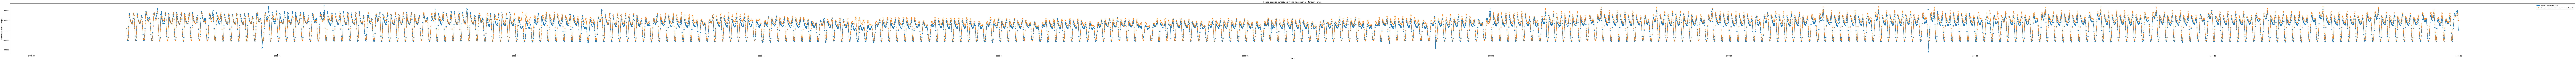

In [85]:
plt.figure(figsize=(300, 6))
plt.plot(test['datetime'], test[target], label='Фактические данные', linestyle='-', marker='o')
plt.plot(test['datetime'], predicted_values, label='Предсказанные данные (Random Forest)', linestyle='--', marker='x')
plt.title('Предсказание потребления электроэнергии (Random Forest)')
plt.xlabel('Дата')
plt.ylabel('Потребление электроэнергии')
plt.legend()
plt.show()

In [87]:
sample = pd.read_csv("sample.csv")
sample

,datetime,total
0,01.01.2009 00:00:00,0
1,01.01.2009 01:00:00,0
2,01.01.2009 02:00:00,0
3,01.01.2009 03:00:00,0
4,01.01.2009 04:00:00,0
...,...,...
4339,30.06.2009 19:00:00,0
4340,30.06.2009 20:00:00,0
4341,30.06.2009 21:00:00,0
4342,30.06.2009 22:00:00,0


In [88]:
sample['datetime'] = pd.to_datetime(sample['datetime'], format="%d.%m.%Y %H:%M:%S")
sample['hour'] = sample['datetime'].dt.hour
sample['day_of_week'] = sample['datetime'].dt.dayofweek
sample['day_of_month'] = sample['datetime'].dt.day
sample['month'] = sample['datetime'].dt.month
sample['year'] = sample['datetime'].dt.year

In [89]:
sample.replace(np.nan, 0, inplace=True)

In [90]:
forecasted_values_sample = best_model.predict(sample[features])

In [91]:
sample['total'] = forecasted_values_sample

In [75]:
sample

,datetime,total,hour,day_of_week,day_of_month,month,year
0,2009-01-01 00:00:00,116933.869244,0,3,1,1,2009
1,2009-01-01 01:00:00,130193.589495,1,3,1,1,2009
2,2009-01-01 02:00:00,127594.512782,2,3,1,1,2009
3,2009-01-01 03:00:00,113286.621565,3,3,1,1,2009
4,2009-01-01 04:00:00,105473.180814,4,3,1,1,2009
...,...,...,...,...,...,...,...
4339,2009-06-30 19:00:00,190693.015037,19,1,30,6,2009
4340,2009-06-30 20:00:00,197545.553334,20,1,30,6,2009
4341,2009-06-30 21:00:00,210070.888108,21,1,30,6,2009
4342,2009-06-30 22:00:00,212650.236205,22,1,30,6,2009


In [92]:
result = sample[['datetime', 'total']]
result

,datetime,total
0,2009-01-01 00:00:00,146699.559218
1,2009-01-01 01:00:00,130150.396404
2,2009-01-01 02:00:00,126740.133111
3,2009-01-01 03:00:00,114576.365609
4,2009-01-01 04:00:00,105005.751850
...,...,...
4339,2009-06-30 19:00:00,190804.899702
4340,2009-06-30 20:00:00,197775.450272
4341,2009-06-30 21:00:00,209827.544276
4342,2009-06-30 22:00:00,212419.802440


In [93]:
result.to_csv('itog.csv', index=False, date_format='%d.%m.%Y %H:%M:%S')

In [86]:
from sklearn.metrics import r2_score

# Вычислим R-squared
r_squared = r2_score(test['total'], predicted_values)

print(f'R-squared: {r_squared}')

R-squared: 0.8932329258065999
